Copyright 2022 Masamichi J. Miyama

# 最適輸送理論に基づく点群データ間の距離の計算
2つの確率分布の間の距離を測りたいというときに、Kullback-Leibler情報量がよく考えられる。しかしながらこの量は距離ではない。また、データの経験分布をもとにこの量を実際に測定しようとする場合にはデータを何らかの意味でヒストグラムに変換し計算を行うが、あるビンの値が0の場合（分布のテールが重ならない）への対処やそもそも高次元データでは次元の呪いが効いてしまうので現実的に測定するのは難しい。

これに対して、最適輸送理論に基づくEarth Mover's Distance (EMD)と呼ばれる距離が提案されている。これは直感的には、ある空間分布を持つ堆積した土を、別の空間分布を持つ堆積に移し替えるときにかかる最小のコストで定義される。コストとしてナイーブには移すべき土の量と移す距離の積が考えられるが、目的に応じたさまざまなコストの定義を考えることができる。異なるサイズの点群データ同士のEMDについても、各点の重みの合計がいずれも1になるように調整すれば定義可能である。また、このEMDを求めるプロセスは線型計画問題として定式可能であり、簡単なソルバーを用いて測定することができる。

このノートでは最適輸送に関するPythonパッケージである`POT`をもちいて2つの点群データ間のEMDを測るデモを示す。

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import ot

## 点群データの生成
例として2次元正規分布に従う2つの点群データを生成する。データ点数は異なっていても良い。

In [39]:
A = np.random.multivariate_normal([-0.5, 0.2], [[1.0, 0.1], [0.1, 1.0]], 2000)
B = np.random.multivariate_normal([0.4, -0.2], [[0.8, 0.2], [0.2, 1.3]], 2000)

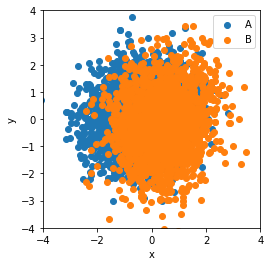

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(A[:, 0], A[:, 1], label="A")
plt.scatter(B[:, 0], B[:, 1], label="B")
plt.xlim(-4, 4)
plt.ylim(-4, 4)

ax.set_aspect('equal')

plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.show()

## コスト行列の計算
`dist`メソッドを用いて2つのデータに含まれる点間の全ての距離を計算する。オプションに何も指定しない場合にはEuclid計量が用いられる。

In [41]:
M = ot.dist(A, B)

## EMDの計算
`emd2`メソッドは評価したいデータ集合に含まれる点の重みを表すベクトルそれぞれとコスト行列を引数にとる。ここではすべてのデータ点が等しい重みを持つとする。すなわち、(1 / データ数)の重みを持つ。以下のコードでは点群A, Bそれぞれに対して重みベクトル`a`, `b`を生成しているが、これらの代わりに空のリスト`[]`を与えても同じように等価な重みを持つと扱われる。

In [47]:
a = np.ones(len(A)) / len(A) # 点群Aの重みベクトル
b = np.ones(len(B)) / len(B) # 点群Bの重みベクトル
emd = ot.emd2(a, b, M)
print(emd)

emd2 = ot.emd2([], [], M)
print(emd2)

1.0463850354578568
1.0463850354578568
